<center><h2 style="font-family: 'Times New Roman';">Case Study Codes</h2></center>

<center><h4 style="font-family: 'Times New Roman';">July 15, 2023</h4></center>

In [1]:
# importing necessary libraries

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")

In [2]:
# reading GoogleStock Price Updated.csv dataset

df = pd.read_csv('GoogleStock Price Updated.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [3]:
# showing the first ten rows of Google stock data

df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956
2013-01-09,18.325075,18.477226,18.233232,18.471472,18.471472,80907012
2013-01-10,18.589338,18.643644,18.355856,18.555555,18.555555,73354572
2013-01-11,18.568569,18.579329,18.425926,18.518269,18.518269,51356592
2013-01-14,18.443443,18.573574,18.076826,18.099348,18.099348,114441444


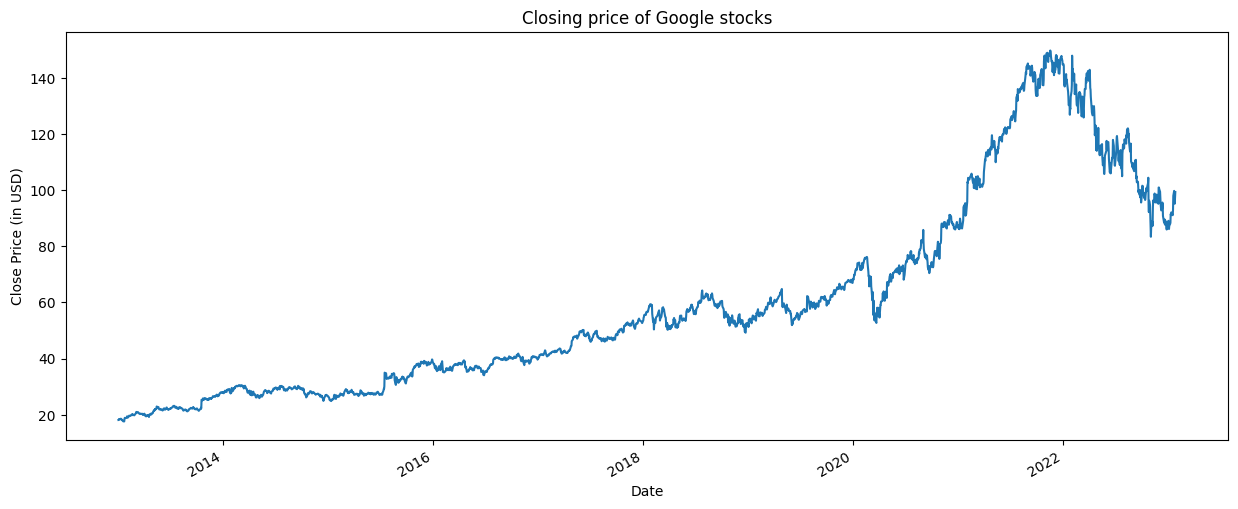

In [4]:
# Explanatory data analysis

df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close Price (in USD)")
plt.title("Closing price of Google stocks")
plt.show()

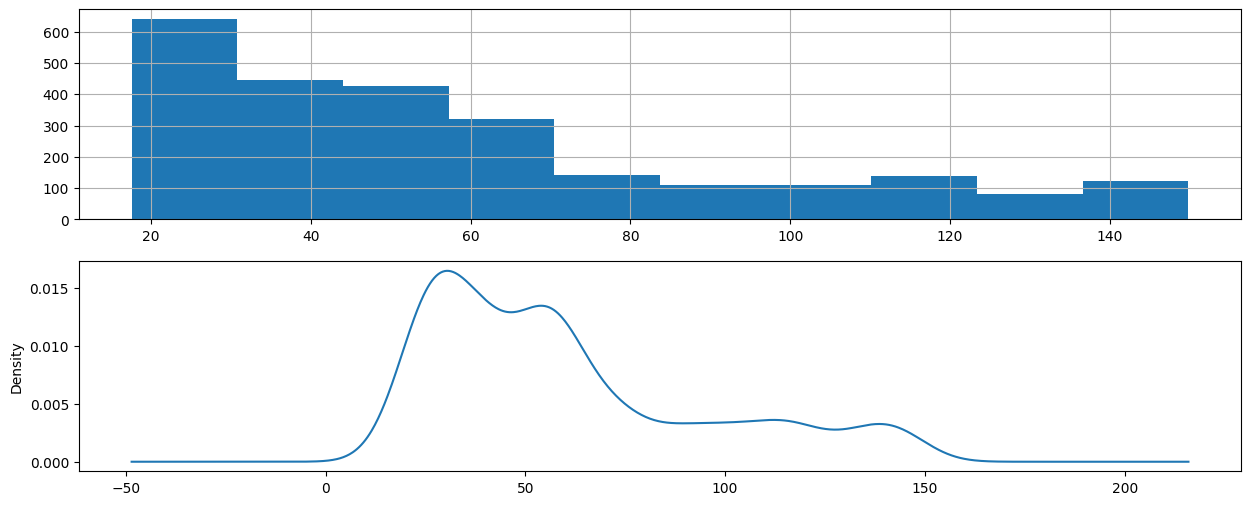

In [5]:
# Kernel density estimation

plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [6]:
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='multiplicative',
                                          period=30)

In [7]:
# Extract the trend and seasonal components

trend = decomposition.trend
seasonal = decomposition.seasonal
df_decomposed = pd.concat([trend, seasonal], axis=1)
print(df_decomposed.head(30))

                trend  seasonal
Date                           
2013-01-02        NaN  0.996802
2013-01-03        NaN  0.998491
2013-01-04        NaN  1.001984
2013-01-07        NaN  1.002228
2013-01-08        NaN  1.001632
2013-01-09        NaN  0.999782
2013-01-10        NaN  1.000786
2013-01-11        NaN  0.998532
2013-01-14        NaN  1.000995
2013-01-15        NaN  1.003345
2013-01-16        NaN  1.001374
2013-01-17        NaN  1.002212
2013-01-18        NaN  0.999136
2013-01-22        NaN  0.999561
2013-01-23        NaN  0.998783
2013-01-24  18.707061  0.999986
2013-01-25  18.762863  1.000374
2013-01-28  18.820462  0.999855
2013-01-29  18.873261  1.001670
2013-01-30  18.923286  1.000619
2013-01-31  18.974929  1.001335
2013-02-01  19.021175  1.001385
2013-02-04  19.062646  0.998438
2013-02-05  19.115478  0.999499
2013-02-06  19.179208  0.999850
2013-02-07  19.248974  0.999034
2013-02-08  19.332883  0.999438
2013-02-11  19.434764  0.997538
2013-02-12  19.544290  0.996598
2013-02-

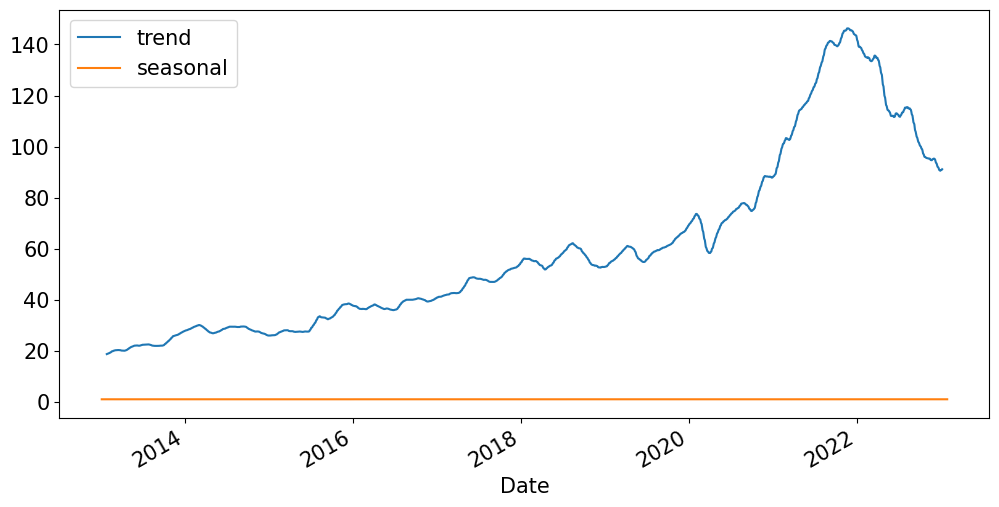

In [8]:
# Plot the values of the df_decomposed DataFrame

dfd = df_decomposed.plot(figsize=(12, 6), fontsize=15);

# Specify axis labels

dfd.set_xlabel('Date', fontsize=15);
plt.legend(fontsize=15);

## AUTO ARIMA

In [9]:
df = pd.read_csv('GoogleStock Price Updated.csv', parse_dates = True)

In [10]:
# Time series Evaluation

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true,y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE is :{np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true,y_pred)}',end='\n\n')

In [11]:
# ADF with Akaike information criterion

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value',
                                'No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [12]:
# ADF Test

Augmented_Dickey_Fuller_Test_func(df['Close'],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -0.776298
p-value                           0.825986
No Lags Used                     23.000000
Number of Observations Used    2512.000000
Critical Value (1%)              -3.432956
Critical Value (5%)              -2.862691
Critical Value (10%)             -2.567383
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [13]:
# Splitting data - assignment of train and test set

X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [14]:
# AUTO ARIMA

stepwise_model = auto_arima(train,start_p=1, start_q=1, max_p=7, max_q=7, 
                            seasonal=False,d=None, trace=True, 
                            error_action='ignore', suppress_warnings=True, 
                            stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8324.454, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8335.353, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8328.448, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8328.368, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8334.826, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8325.608, Time=2.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8325.688, Time=1.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8330.289, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8330.420, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8325.851, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8324.743, Time=0.64 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 10.693 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2506
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4158.227
Date:                Sat, 15 Jul 2023   AIC                           8324.454
Time:                        11:41:54   BIC                           8347.758
Sample:                             0   HQIC                          8332.914
                               - 2506                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0079      0.006      1.268      0.205      -0.004       0.020
ar.L1          0.7440      0.059     12.595      0.000       0.628       0.860
ma.L1         -0.7955      0.054    -14.652      0.000      -0.902      -0.689
sigma2         1.6194      0.019     84.031      0.000       1.582       1.657
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):              9025.53
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):              20.34   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Forecast both results and the confidence for the next 30 days and store it 
# in a DataFrame

forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Lower_bound','Upper_bound'])
df_conf["new_index"] = range(2506, 2536)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 38.56767982424719
MAE is : 5.598494093992771
RMSE is :6.2102882239270665
MAPE is : 6.26573810822338
R2 is : -1.4829164864241617



In [16]:
# Rearrange the indexes for the plots to align

forecast["new_index"] = range(2506, 2536)
forecast = forecast.set_index("new_index")

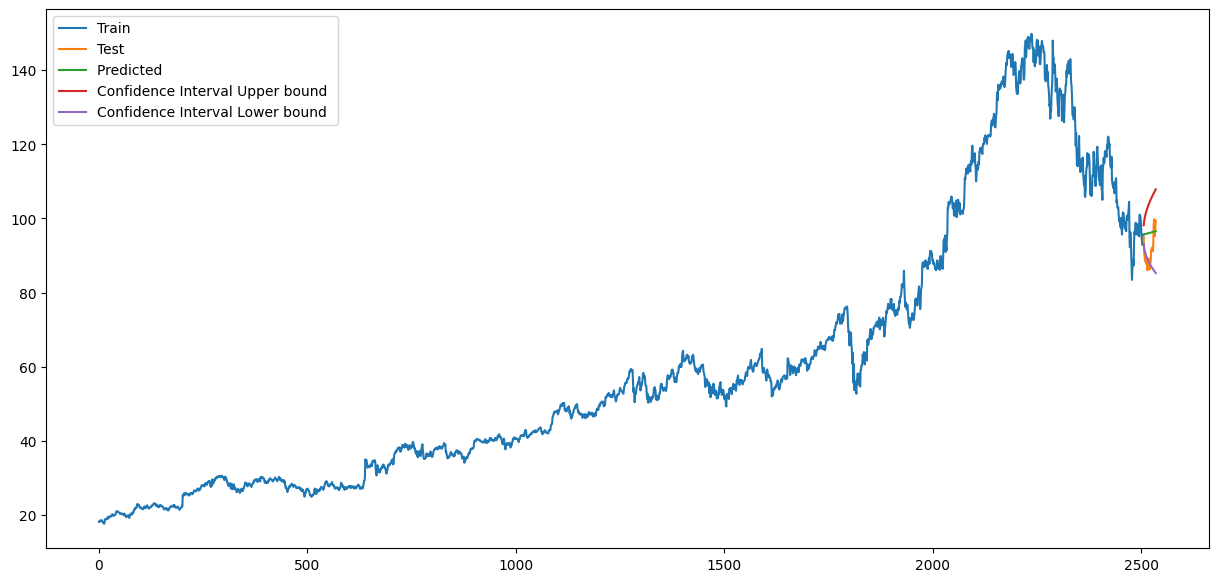

In [17]:
# Plot the results with confidence bounds

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

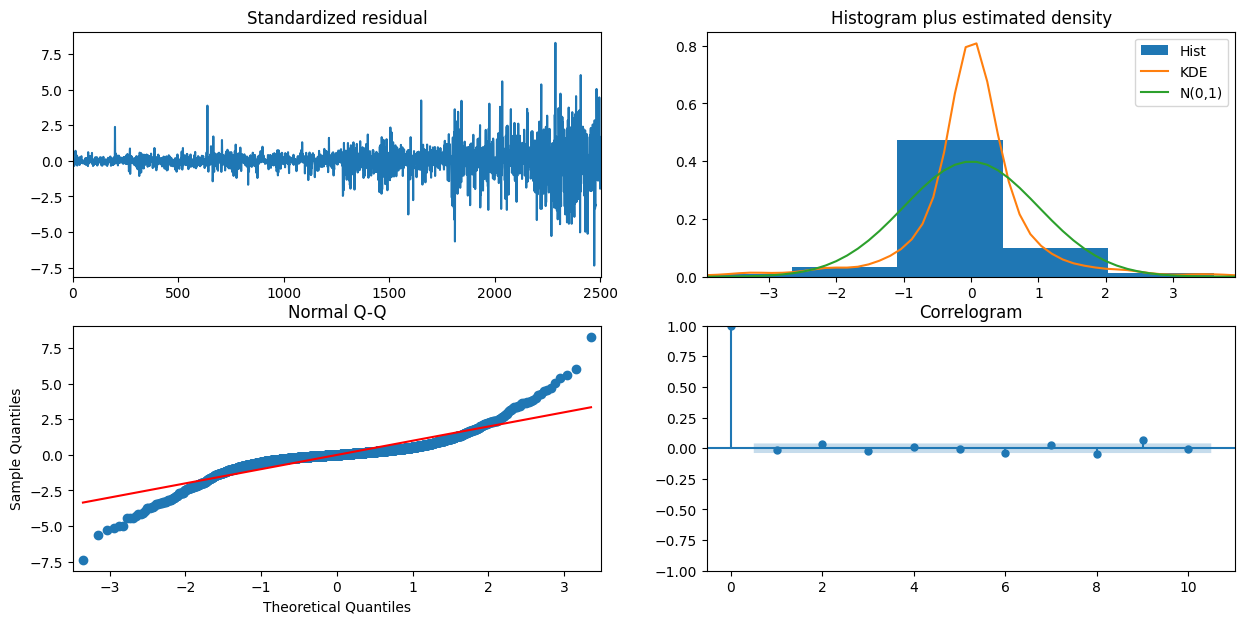

In [18]:
# diagnostic plot

stepwise_model.plot_diagnostics();

In [19]:
# forecast using the best model

pred,conf_int = stepwise_model.predict(n_periods=185,return_conf_int=True)
pred = pd.DataFrame(pred,columns=['Close'])
df_conf = pd.DataFrame(conf_int,columns= ['Lower_bound','Upper_bound'])
df_conf["new_index"] = range(2537, 2722)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 38.56767982424719
MAE is : 5.598494093992771
RMSE is :6.2102882239270665
MAPE is : 6.26573810822338
R2 is : -1.4829164864241617



In [20]:
# Predicting the close price from January 28, 2023 to July 31, 2023

pred["new_index"] = range(2537, 2722)
pd.set_option('display.max_rows',None)
pred = pred.set_index("new_index")
pred

,Close
new_index,
2537,95.660749
2538,95.691544
2539,95.722373
2540,95.753225
2541,95.784096
2542,95.814980
2543,95.845874
2544,95.876776
2545,95.907683


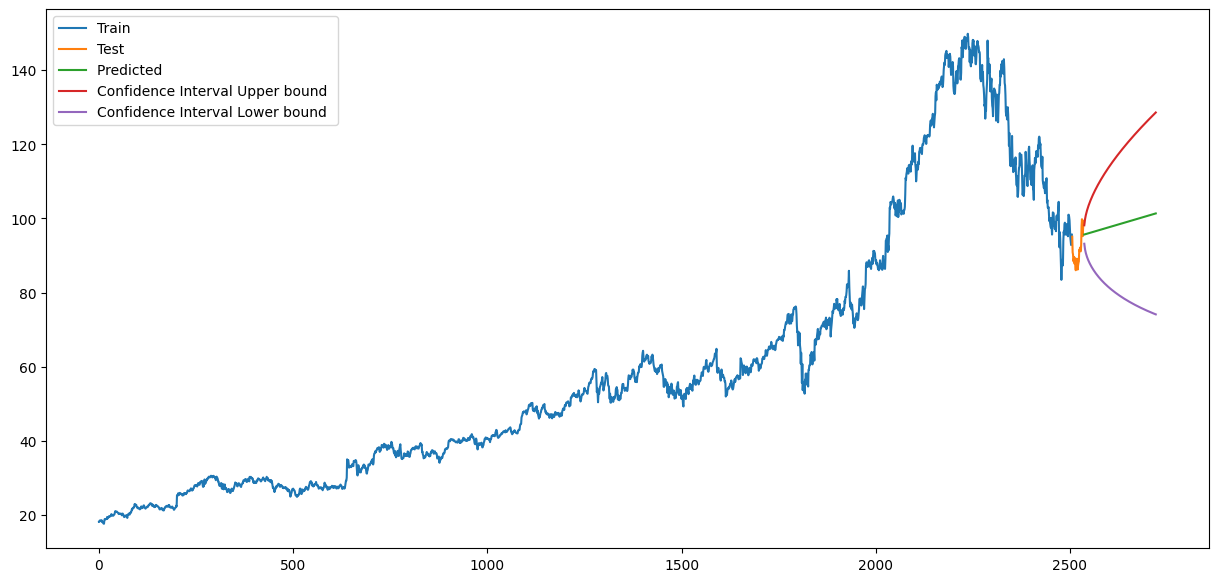

In [21]:
# Plot the predicted results with confidence bounds

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(pred, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

## End